In [1]:
using LazySets, Plots

┌ Info: Precompiling LazySets [b4f0291d-fe17-52bc-9479-3d1a343d9043]
└ @ Base loading.jl:1278


In [23]:
n = 2
H = rand(Hyperrectangle, dim=n)
H2 = rand(Hyperrectangle, dim=n)
X = ConvexHull(rand(n, n) * H, H) ⊕ H2;

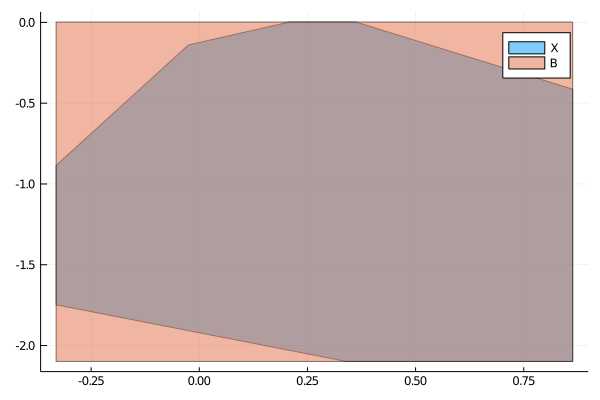

In [24]:
plot(X, lab="X")
plot!(box_approximation(X), lab="B")

In [15]:
using Polyhedra, CDDLib

In [25]:
Zvrep = overapproximate(concretize(X), Zonotope, OctDirections(2), algorithm="vrep")

Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([0.2661008032115124, -1.0807775417525876], [0.0328447971951078 0.2079440531944938 0.35624974734533976 0.0; 0.0328447971951078 -0.2079440531944938 0.0 0.8424479306774059])

In [58]:
P = concretize(X)
U = vcat([c.a for c in constraints_list(P)],
         [-c.a for c in constraints_list(P)],
          Vector.(collect(OctDirections(2))));

Zvrep_U = overapproximate(concretize(X), Zonotope, CustomDirections(U), algorithm="vrep")

Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([0.26610080321151336, -1.0807775417525884], [0.0 0.0 … 0.03284479719510987 0.17833850709090324; -0.8424479306774043 0.0 … 0.03284479719510987 -0.17833850709090324])

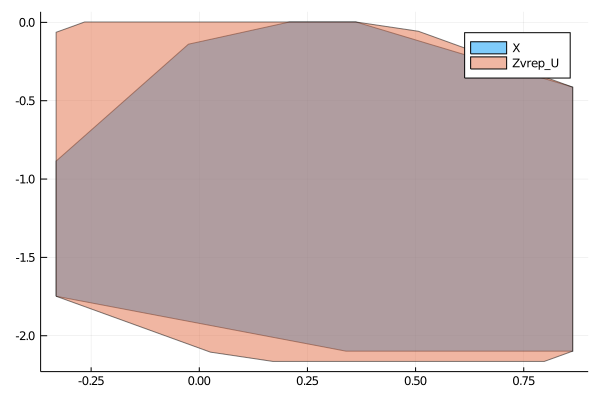

In [59]:
plot(X, lab="X")
#plot!(box_approximation(X), lab="B")
#plot!(Zvrep, lab="Zvrep")
plot!(Zvrep_U, lab="Zvrep_U")

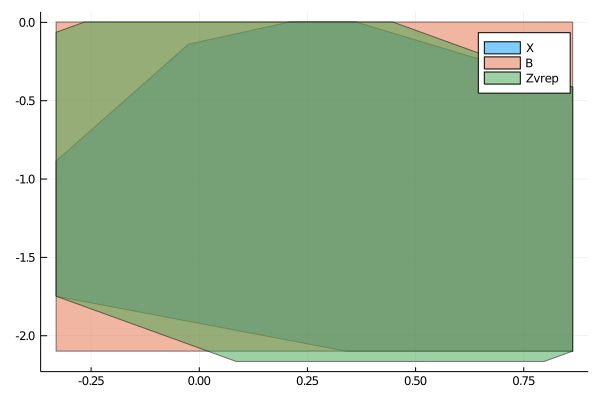

In [39]:
plot(X, lab="X")
plot!(box_approximation(X), lab="B")
plot!(Zvrep, lab="Zvrep")

In [ ]:
Zcpa = overapproximate(concretize(X), Zonotope, OctDirections(2), algorithm="cpa")

In [ ]:
plot!(Zcpa, lab="Zcpa")

In [ ]:
function cluster(F::Flowpipe{N, RT, VRT}, idx, ::ZonotopeClustering{Missing}) where {N, ZT<:Zonotope, RT<:ReachSet{N, ZT}, VRT<:AbstractVector{RT}}
    if length(idx) == 1
        return F[idx]
    elseif length(idx) == 2
        X = ConvexHull(set(F[idx[1]]), set(F[idx[2]]))
        Y = overapproximate(X, Zonotope) # TODO pass algorithm
        return [ReachSet(Y, tspan(F[idx]))]
    else
        Zaux = overapproximate(ConvexHull(set(F[idx[1]]), set(F[idx[2]])), Zonotope)
        for k in 3:length(idx)
            Zaux = overapproximate(ConvexHull(Zaux, set(F[idx[k]])), Zonotope)
        end
        return [ReachSet(Zaux, tspan(F[idx]))]
    end
end

In [61]:
Z1 = rand(Zonotope, dim=2)
Z2 = rand(Zonotope, dim=2)
Z3 = rand(Zonotope, dim=2);

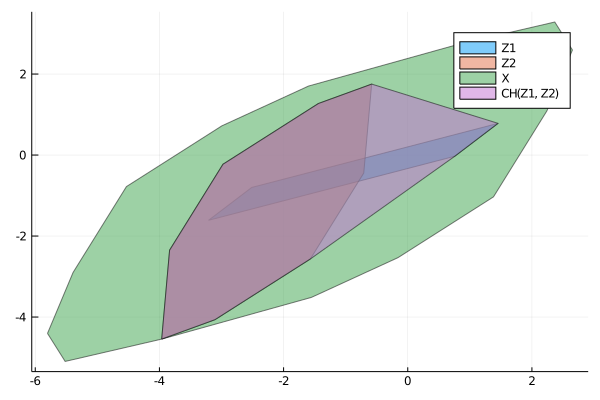

In [65]:
plot(Z1, lab="Z1")
plot!(Z2, lab="Z2")

C = ConvexHull(Z1, Z2)
X = overapproximate(C, Zonotope)
plot!(X, lab="X")

plot!(C, lab="CH(Z1, Z2)")

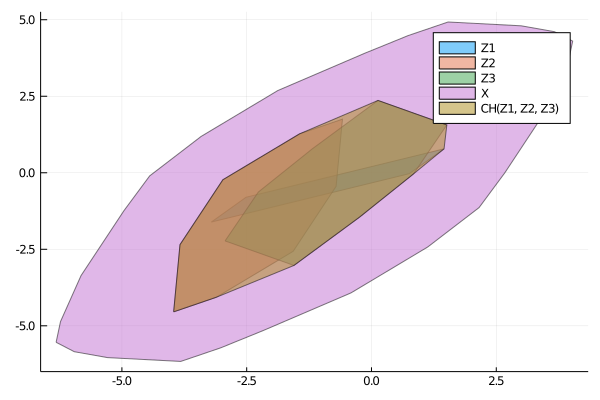

In [67]:
plot(Z1, lab="Z1")
plot!(Z2, lab="Z2")
plot!(Z3, lab="Z3")

C = ConvexHullArray([Z1, Z2, Z3])
X = overapproximate(C, Zonotope)

plot!(X, lab="X")
plot!(C, lab="CH(Z1, Z2, Z3)")

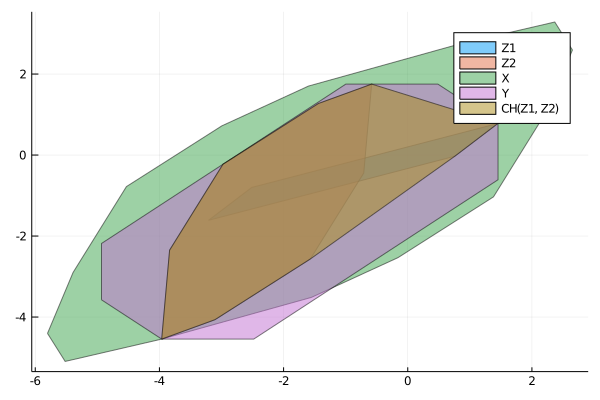

In [69]:
plot(Z1, lab="Z1")
plot!(Z2, lab="Z2")

C = ConvexHull(Z1, Z2)
X = overapproximate(C, Zonotope)
Y = overapproximate(C, Zonotope, OctDirections(2))
plot!(X, lab="X")
plot!(Y, lab="Y")
plot!(C, lab="CH(Z1, Z2)")

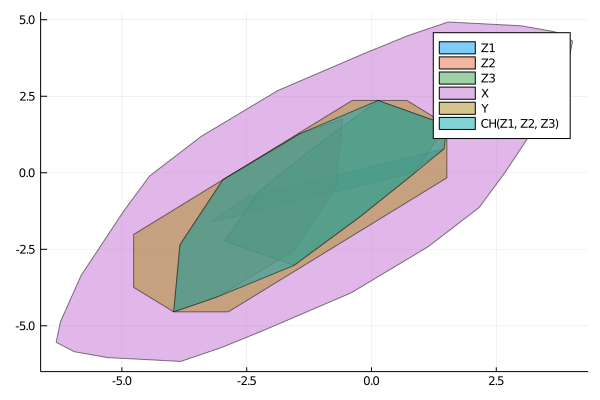

In [70]:
plot(Z1, lab="Z1")
plot!(Z2, lab="Z2")
plot!(Z3, lab="Z3")

C = ConvexHullArray([Z1, Z2, Z3])
X = overapproximate(C, Zonotope)
Y = overapproximate(C, Zonotope, OctDirections(2))

plot!(X, lab="X")
plot!(Y, lab="Y")
plot!(C, lab="CH(Z1, Z2, Z3)")